# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
states_data = pd.read_csv("../data/states_edu.csv")
print(states_data.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [26]:
years_cols = [col for col in states_data.columns if col.isdigit()]
num_years = len(years_cols)
years = states_data["YEAR"].max() - states_data["YEAR"].min()
print(years)

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [19]:
michigan_data = states_data[states_data["STATE"] == "MICHIGAN"]
ohio_data = states_data[states_data["STATE"] == "OHIO"]

michigan_avg_score = michigan_data[years_cols].mean().mean()
ohio_avg_score = ohio_data[years_cols].mean().mean()

if michigan_avg_score > ohio_avg_score:
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [31]:
score = states_data["YEAR"][2019].mean()
print(score)

KeyError: 2019

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [24]:
scores_by_state = states_data.groupby("STATE")[years_cols].max()
print(scores_by_state)

Empty DataFrame
Columns: []
Index: [ALABAMA, ALASKA, ARIZONA, ARKANSAS, CALIFORNIA, COLORADO, CONNECTICUT, DELAWARE, DISTRICT_OF_COLUMBIA, DODEA, FLORIDA, GEORGIA, HAWAII, IDAHO, ILLINOIS, INDIANA, IOWA, KANSAS, KENTUCKY, LOUISIANA, MAINE, MARYLAND, MASSACHUSETTS, MICHIGAN, MINNESOTA, MISSISSIPPI, MISSOURI, MONTANA, NATIONAL, NEBRASKA, NEVADA, NEW_HAMPSHIRE, NEW_JERSEY, NEW_MEXICO, NEW_YORK, NORTH_CAROLINA, NORTH_DAKOTA, OHIO, OKLAHOMA, OREGON, PENNSYLVANIA, RHODE_ISLAND, SOUTH_CAROLINA, SOUTH_DAKOTA, TENNESSEE, TEXAS, UTAH, VERMONT, VIRGINIA, WASHINGTON, WEST_VIRGINIA, WISCONSIN, WYOMING]


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [32]:
expenditure_column = "TOTAL_EXPENDITURE" 
students_column = "GRADES_ALL_G" 
states_data["expenditure_per_student"] = states_data[expenditure_column] / states_data[students_column]

Feature engineering justification: **<I just took the total expenditure and compared it to the total studetns in all the grades>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

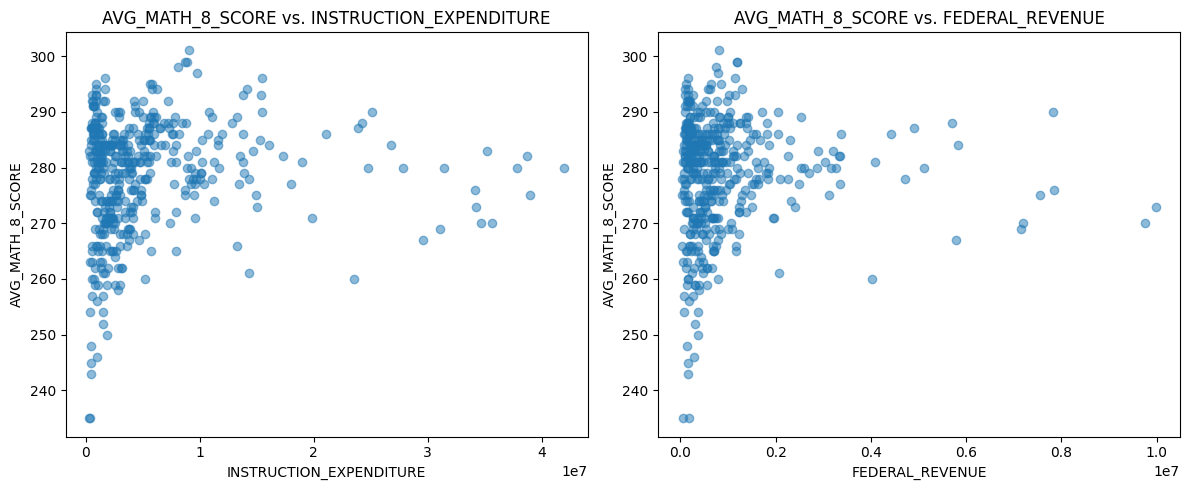

In [35]:
response_variable = "AVG_MATH_8_SCORE" 
predictor_variable1 = "INSTRUCTION_EXPENDITURE"
predictor_variable2 = "FEDERAL_REVENUE"

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(states_data[predictor_variable1], states_data[response_variable], alpha=0.5)
plt.title(f"{response_variable} vs. {predictor_variable1}")
plt.xlabel(predictor_variable1)
plt.ylabel(response_variable)

# Scatterplot for response variable vs. predictor variable 2
plt.subplot(1, 2, 2)
plt.scatter(states_data[predictor_variable2], states_data[response_variable], alpha=0.5)
plt.title(f"{response_variable} vs. {predictor_variable2}")
plt.xlabel(predictor_variable2)
plt.ylabel(response_variable)

plt.tight_layout()
plt.show()

**<I want to see if instruction expenditure and federal revenue affects average math score>**

**Visualization 2**

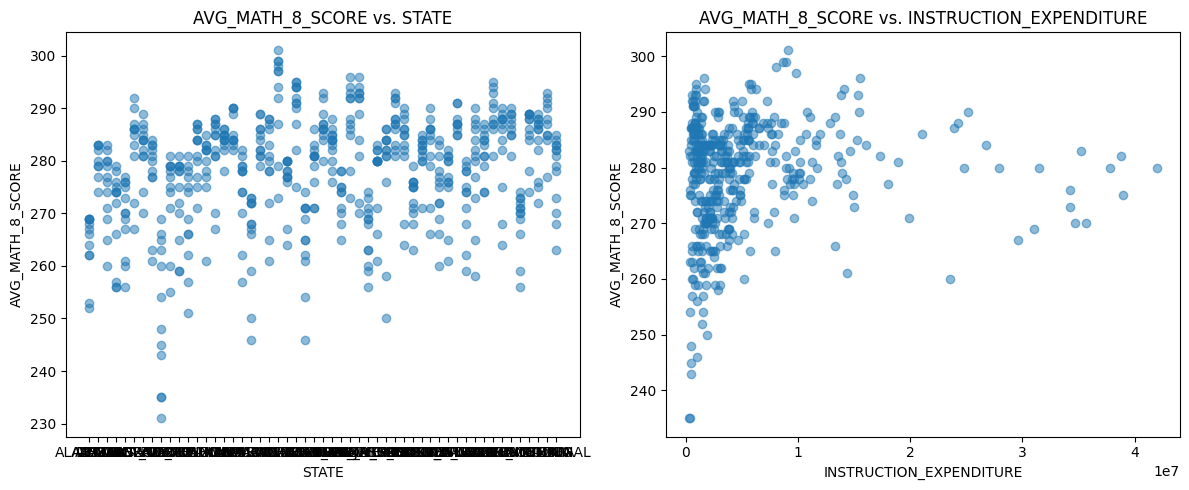

In [37]:
response_variable = "AVG_MATH_8_SCORE" 
predictor_variable1 = "STATE"
predictor_variable2 = "INSTRUCTION_EXPENDITURE"

# Create scatterplots to visualize the relationships
plt.figure(figsize=(12, 5))

# Scatterplot for response variable vs. predictor variable 1
plt.subplot(1, 2, 1)
plt.scatter(states_data[predictor_variable1], states_data[response_variable], alpha=0.5)
plt.title(f"{response_variable} vs. {predictor_variable1}")
plt.xlabel(predictor_variable1)
plt.ylabel(response_variable)

# Scatterplot for response variable vs. predictor variable 2
plt.subplot(1, 2, 2)
plt.scatter(states_data[predictor_variable2], states_data[response_variable], alpha=0.5)
plt.title(f"{response_variable} vs. {predictor_variable2}")
plt.xlabel(predictor_variable2)
plt.ylabel(response_variable)

plt.tight_layout()
plt.show()

**<see if state and their instructiuon expenditure affect math score >**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = states_data[['ENROLL','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = states_data.loc[X.index]['AVG_READING_8_SCORE']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 30, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [52]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [60]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

4.0813574742060155e-11
[-4.32560655e-17 -4.44089210e-16  1.00000000e+00]


1.0

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

In [ ]:
col_name = "ENROLL"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('ENROLL')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<Predicted scores based on previous scores and school enrollment\>**